In [2]:
import pandas as pd

import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [3]:
df  = pd.read_csv("instagram_reach.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [5]:
df.describe()
df.nunique()

Unnamed: 0           27
S.No                 30
USERNAME             95
Caption              94
Followers            94
Hashtags             98
Time since posted    11
Likes                55
dtype: int64

In [6]:
df.shape

(100, 8)

In [7]:
df.loc[df['Caption'].isnull()]

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
52,13,21,opensourcedworkplace,NaN,348,#HR #workplace#officedesign #iot #bigdata #off...,4 hours,17
67,5,17,remi_ole,NaN,2175,#entrepreneur #entrepreneurial#entrepreneurmin...,2 hours,41
72,10,25,kamalalshehabi,NaN,955,#qoute #success#motivation #entrepreneur #insp...,2 hours,20
79,6,11,anandvanjape,NaN,460,#Designer #style #artist#brand #logo #monogram...,2 hours,29
85,12,23,monde_informatique,NaN,2455,monde_informatique#client #project#product #pr...,3 hours,24
89,2,12,inmemovement,NaN,1196,#INME #inmemovement#indianeedsmoreentrepreneur...,2 hours,16


In [8]:
df['Caption'].unique()
df.dropna(inplace=True)

In [9]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [10]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'S.No'], inplace=True)

 ## Analyzing Instagram Reach

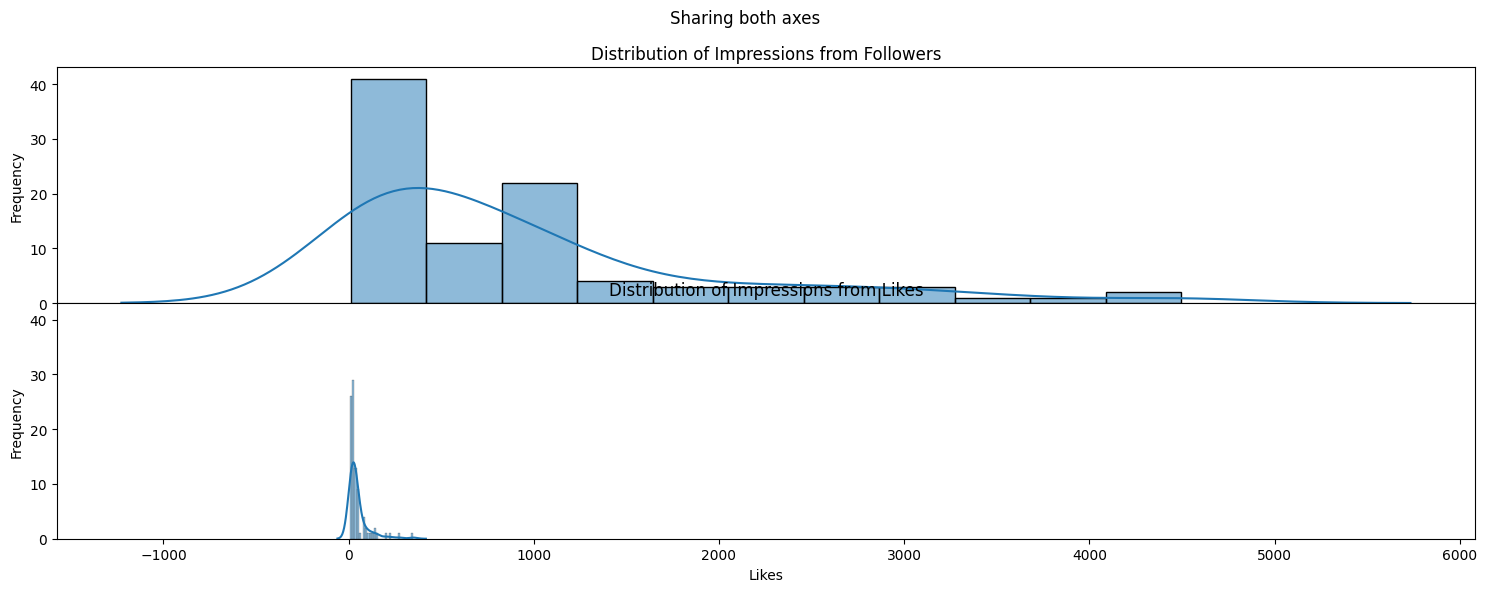

In [11]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn  as sns


fig = plt.figure(figsize=(15, 6))
# fig, axs = plt.subplots(2)

gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
# # Distribution of Impressions from Followers
# axs[0].hist(df["Followers"],density=True, alpha=0.5)
# axs[0].plot(np.linspace(min(df["Followers"]), max(df["Followers"]), 100), 
#          stats.gaussian_kde(df["Followers"])(np.linspace(min(df["Followers"]), max(df["Followers"]), 100)),
#          color='red', label='Kernel Density')
sns.histplot(df["Followers"], kde=True,ax=axs[0],kde_kws=dict(cut=3))
axs[0].set_xlabel("Followers")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Distribution of Impressions from Followers")

# Distribution of Impressions from Likes
# axs[1].hist(df["Likes"])
sns.histplot(df["Likes"], kde=True,ax=axs[1],kde_kws=dict(cut=3))
axs[1].set_xlabel("Likes")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Impressions from Likes")
# Set legend in top left corner
# fig.legend(loc='upper left')
plt.tight_layout()
plt.show()


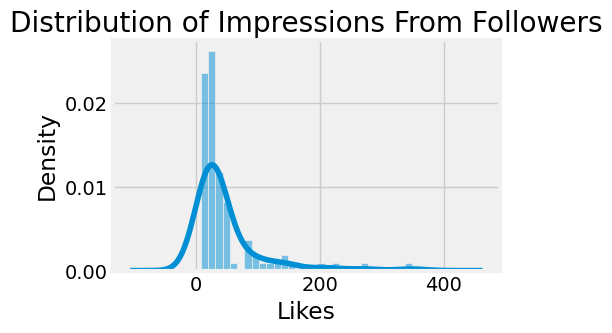

In [12]:
## Distribution of Impressions From Followers

plt.figure(figsize=(5, 3))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.histplot(df['Likes'],kde=True, stat="density",kde_kws=dict(cut=5))
plt.show()

In [13]:
import plotly.express as px

## Relation between Likes and Followers

followers = df["Followers"].sum()
likes = df["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(df, values=values, names=labels, title='Impressions on Instagram Posts From Various Sources')
fig.show()


In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

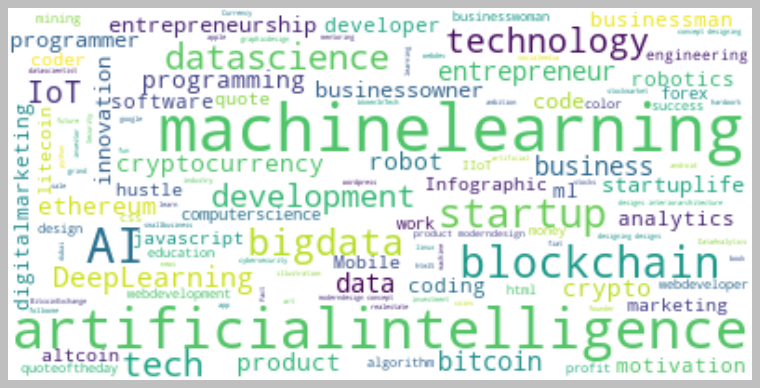

In [16]:
## Plotting Word-Cloud for Hashtag Related Data

text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
## Plotting Scatter-plot for showing Relationship Between Likes and Followers 

figure = px.scatter(data_frame = df, x="Likes",
                    y="Followers", trendline="ols", 
                    title = "Relationship Between Likes and Followers")
figure.show()

In [19]:
df

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [83]:
from sklearn.model_selection import train_test_split

# Select the relevant features and target variables

features = ['Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted'

# Split the data into training and testing sets

X = df[features]
y_likes = df[target_likes]
y_time_since_posted = df[target_time_since_posted]
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import re

# Preprocess the text features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

### >Train a model to predict the number of likes:

In [96]:
# Train a model to predict the number of likes
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, y_likes_train)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print("Mean Squared Error (Likes):", likes_mse)
likes_r2_score = r2_score(y_likes_test, likes_predictions)
print(f"Likes r2_score: {likes_r2_score}")


Mean Squared Error (Likes): 1604.7854057782426
Likes r2_score: -0.005399939408044174


### Train a model to predict the time since posted

In [86]:
# Preprocess the time since posted variable
def extract_numerical_value(time_string):
    numerical_value = re.findall(r'\d+', time_string)[0]
    return int(numerical_value)
y_time_since_posted_train = y_time_since_posted_train.apply(extract_numerical_value)
y_time_since_posted_test = y_time_since_posted_test.apply(extract_numerical_value)

In [93]:
# Train a model to predict the time since posted
time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)
time_since_posted_r2_score = r2_score(y_time_since_posted_test, time_since_posted_predictions)
print(f'Times since posted r2_score: {time_since_posted_r2_score}')

Mean Squared Error (Time Since Posted): 11.842568301429147
Times since posted r2_score: -0.01741245997523122


### changing the code 
    - split the df in to numerical_features and text_features
    - then train test split
    - OneHotEncoder to text_features
    - using np.hstack combining the text_features and numerical_features
the accuracy and r2_score improved

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import re

# Select the relevant features and target variables
text_features = ['Caption', 'Hashtags']
numerical_features = ['Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted'



# Split the data into training and testing sets
X_text = df[text_features]
X_numerical = df[numerical_features]
y_likes = df[target_likes]
y_time_since_posted = df[target_time_since_posted]

X_text_train, X_text_test, X_numerical_train, X_numerical_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X_text, X_numerical, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

# Preprocess the text features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_text_train_encoded = encoder.fit_transform(X_text_train)
X_text_test_encoded = encoder.transform(X_text_test)

# Combine one-hot encoded text features with numerical features
X_train_encoded = np.hstack((X_text_train_encoded, X_numerical_train))
X_test_encoded = np.hstack((X_text_test_encoded, X_numerical_test))

# Train a model to predict the number of likes
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, y_likes_train)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print("Mean Squared Error (Likes):", likes_mse)
likes_r2_score = r2_score(y_likes_test, likes_predictions)
print(f"Likes r2_score: {likes_r2_score}")

# Preprocess the time since posted variable
def extract_numerical_value(time_string):
    numerical_value = re.findall(r'\d+', time_string)[0]
    return int(numerical_value)

y_time_since_posted_train = y_time_since_posted_train.apply(extract_numerical_value)
y_time_since_posted_test = y_time_since_posted_test.apply(extract_numerical_value)

# Train a model to predict the time since posted
time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)
time_since_posted_r2_score = r2_score(y_time_since_posted_test, time_since_posted_predictions)
print(f'Times since posted r2_score: {time_since_posted_r2_score}')

Mean Squared Error (Likes): 1119.7158622453967
Likes r2_score: 0.2984966986848886
Mean Squared Error (Time Since Posted): 11.842568301429147
Times since posted r2_score: -0.01741245997523122


## using the NLP text preprocessing technique

In [89]:
import nltk
nltk.download('punkt')  # Download the word tokenizer
nltk.download('stopwords')  # Download the stopwords corpus
nltk.download('wordnet')  # Download the WordNet lemmatizer
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\arunk\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [90]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk

def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Part-of-speech tagging
    pos_tags = pos_tag(filtered_words)
    
    # Named Entity Recognition
    ner_tags = ne_chunk(pos_tags)
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word, tag in pos_tags]
    
    # Extract named entities
    named_entities = []
    for chunk in ner_tags:
        if hasattr(chunk, 'label'):
            named_entities.append(' '.join(c[0] for c in chunk))
    
    # Join the named entities and lemmatized words back into a preprocessed text
    preprocessed_text = ' '.join(named_entities + lemmatized_words)
    
    return preprocessed_text
df['Hashtags_NER'] = df['Hashtags'].apply(preprocess_text)
df['Caption_NER'] = df['Caption'].apply(preprocess_text)


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import re

# Select the relevant features and target variables

text_features = ['Caption_NER', 'Hashtags_NER']
numerical_features = ['Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted'

# Split the data into training and testing sets
X_text = df[text_features]
X_numerical = df[numerical_features]
y_likes = df[target_likes]
y_time_since_posted = df[target_time_since_posted]

X_text_train, X_text_test, X_numerical_train, X_numerical_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X_text, X_numerical, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

# Preprocess the text features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_text_train_encoded = encoder.fit_transform(X_text_train)
X_text_test_encoded = encoder.transform(X_text_test)

# Combine one-hot encoded text features with numerical features
X_train_encoded = np.hstack((X_text_train_encoded, X_numerical_train))
X_test_encoded = np.hstack((X_text_test_encoded, X_numerical_test))

# Train a model to predict the number of likes
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, y_likes_train)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print("Mean Squared Error (Likes):", likes_mse)
likes_r2_score = r2_score(y_likes_test, likes_predictions)
print(f"Likes r2_score: {likes_r2_score}")

# Preprocess the time since posted variable
def extract_numerical_value(time_string):
    numerical_value = re.findall(r'\d+', time_string)[0]
    return int(numerical_value)

y_time_since_posted_train = y_time_since_posted_train.apply(extract_numerical_value)
y_time_since_posted_test = y_time_since_posted_test.apply(extract_numerical_value)

# Train a model to predict the time since posted
time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)
time_since_posted_r2_score = r2_score(y_time_since_posted_test, time_since_posted_predictions)
print(f'Times since posted r2_score: {time_since_posted_r2_score}')

Mean Squared Error (Likes): 1119.7158622455981
Likes r2_score: 0.2984966986847625
Mean Squared Error (Time Since Posted): 11.842568301429147
Times since posted r2_score: -0.01741245997523122
